# <center>Determinación de la constante de proporcionalidad de la fuerza de resistencia del aire en objetos esféricos mediante el método de bisección

## <center>Proyecto 1 - Funciones No Lineales  

In [1]:
# Importando librerías a utilizar
from pylab import *
import pandas as pd
import sympy as sy
from sympy import *
from sympy.utilities.lambdify import lambdify, implemented_function
import timeit
import tracemalloc
import matplotlib.pyplot as plt



#Definiendo “x” como símbolo
S = sy.symbols('S')

### Definición de los métodos numéricos para ecuaciones no lineales. Raíces de ecuaciones.

In [2]:
# Método de Bisección (Abierto)
# (a,b) representan el intervalo


def Biseccion(f, a, b, error = 0.00001):
    
    start = timeit.default_timer()
    xl = a
    xu = b
    xr = (a+b)/2
    ea = 100 #Error Aproximado
    i =0
    
    Lista_xl = [xl]
    Lista_xu = [xu]
    Lista_xr = [xr]
    Lista_fxl = [f.subs(S,xl)]
    Lista_fxu = [f.subs(S,xu)]
    Lista_fxr = [f.subs(S,xr)]
    Error = [ea]
    
    
    while ea > error:
        if f.subs(S,xl)*f.subs(S,xr)<0:
            xu = xr
        elif f.subs(S,xr)*f.subs(S,xu)<0:
            xl = xr
        else:
            break
           
        xr_old = xr
        xr = (xl+xu)/2
        ea = abs((xr-xr_old)/xr)*100
        i +=1
        
        Lista_xl.append(xl)
        Lista_xu.append(xu)
        Lista_xr.append(xr)
        Lista_fxl.append(f.subs(S,xl))
        Lista_fxu.append(f.subs(S,xu))
        Lista_fxr.append(f.subs(S,xr))
        Error.append(ea)
    
    Tabla = pd.DataFrame((zip(Lista_xl, Lista_xr, Lista_xu, Lista_fxl, Lista_fxr, Lista_fxu, Error)), columns = ['Xl', 'Solución Xr', 'Xu', 'f(Xl)', 'f(Xr)', 'f(Xu)', 'Error (%)'])
    
    end = timeit.default_timer()
    return xr, len(Lista_xr),(-start+end)

### Constantes y datos experimentales durante la experimentación  

Datos experimentales de posición y tiempos para las alturas 1 y 2.

In [3]:
g = 9.8

t1 = [0.883, 0.850, 0.867, 0.883, 0.900,\
      0.917, 0.933, 0.950, 0.967, 0.983,\
      1.000, 1.017, 1.033, 1.050, 1.067,\
      1.083, 1.100, 1.117, 1.133, 1.167,\
      1.183, 1.200, 1.217, 1.233, 1.250]

y1 = [2.314, 2.378, 2.448, 2.514, 2.584,\
      2.655, 2.721, 2.792, 2.863, 2.930,\
      3.001, 3.072, 3.139, 3.211, 3.282,\
      3.350, 3.421, 3.493, 3.561, 3.704,\
      3.772, 3.844, 3.916, 3.984, 4.056]

t2 = [0.500, 0.517, 0.533, 0.550, 0.567,\
      0.583, 0.600, 0.617, 0.633, 0.650,\
      0.667, 0.683, 0.700, 0.717, 0.733,\
      0.750, 0.767, 0.783, 0.800, 0.817,\
      0.833, 0.850, 0.867, 0.883, 0.900,\
      0.917, 0.933, 0.950, 0.967, 0.983,\
      1.000, 1.017, 1.033, 1.050, 1.067,\
      1.083, 1.100, 1.117, 1.133, 1.150,\
      1.167, 1.183, 1.200, 1.217, 1.233,\
      1.250, 1.267, 1.283, 1.300, 1.317,\
      1.333, 1.350, 1.367, 1.383, 1.400,\
      1.417, 1.433, 1.450, 1.467, 1.483,\
      1.500, 1.517, 1.533, 1.550, 1.567,\
      1.583, 1.600, 1.617, 1.633, 1.650,\
      1.667, 1.683, 1.700, 1.717, 1.733,\
      1.750, 1.767]

y2 = [1.010, 1.069, 1.124, 1.184, 1.245,\
      1.302, 1.364, 1.426, 1.486, 1.549,\
      1.613, 1.673, 1.738, 1.803, 1.864,\
      1.910, 1.996, 2.058, 2.124, 2.191,\
      2.254, 2.321, 2.388, 2.452, 2.519,\
      2.587, 2.651, 2.719, 2.787, 2.851,\
      2.920, 2.988, 3.052, 3.121, 3.190,\
      3.254, 3.323, 3.392, 3.456, 3.525,\
      3.594, 3.659, 3.728, 3.797, 3.862,\
      3.932, 4.001, 4.066, 4.135, 4.204,\
      4.269, 4.339, 4.408, 4.473, 4.542,\
      4.612, 4.677, 4.746, 4.816, 4.881,\
      4.950, 5.020, 5.085, 5.154, 5.224,\
      5.290, 5.358, 5.428, 5.493, 5.563,\
      5.632, 5.697, 5.767, 5.836, 5.902,\
      5.971, 6.041]

## Solución Mediante Bisección  


In [4]:
S1 = []
T1 = []
M1 = []
for j in range(len(y1)):
    y = y1[j]
    t = t1[j]
    f = y-(2*g/S) * (2/S* sy.ln((e**(S*t)+1)/2)-t) #Función
    tracemalloc.start()
    valor, NI, TE = Biseccion(f,2,10)
    T1.append(TE)
    actual, pico = tracemalloc.get_traced_memory()
    #Byte a Megabyte
    print('Memoria actual: ', round(actual/(1024**2),4), "; Pico: ", round(pico/(1024**2),4))
    M1.append(((pico/1024**2)-(actual/1024**2)))
    tracemalloc.reset_peak()
    S1.append(valor)
tracemalloc.stop()

Memoria actual:  0.5611 ; Pico:  0.5895
Memoria actual:  1.1036 ; Pico:  1.112
Memoria actual:  1.533 ; Pico:  1.551
Memoria actual:  1.7708 ; Pico:  1.8012
Memoria actual:  2.0711 ; Pico:  2.0795
Memoria actual:  2.2043 ; Pico:  2.2613
Memoria actual:  2.3969 ; Pico:  2.4553
Memoria actual:  2.5732 ; Pico:  2.6306
Memoria actual:  2.7274 ; Pico:  2.7788
Memoria actual:  2.8829 ; Pico:  2.9378
Memoria actual:  3.06 ; Pico:  3.0685
Memoria actual:  3.2278 ; Pico:  3.2436
Memoria actual:  3.3686 ; Pico:  3.393
Memoria actual:  3.5334 ; Pico:  3.5431
Memoria actual:  3.658 ; Pico:  3.6949
Memoria actual:  3.8149 ; Pico:  3.8491
Memoria actual:  3.9686 ; Pico:  4.0254
Memoria actual:  4.1126 ; Pico:  4.1822
Memoria actual:  4.2756 ; Pico:  4.3252
Memoria actual:  4.4151 ; Pico:  4.4894
Memoria actual:  4.6079 ; Pico:  4.6568
Memoria actual:  4.7315 ; Pico:  4.7631
Memoria actual:  4.8946 ; Pico:  4.9419
Memoria actual:  5.0773 ; Pico:  5.0858
Memoria actual:  5.1741 ; Pico:  5.201


In [5]:
np.mean(S1)

4.614306869506836

In [6]:
np.std(S1)

0.1377000172912422

In [7]:
np.mean(T1)

0.27090812799999997

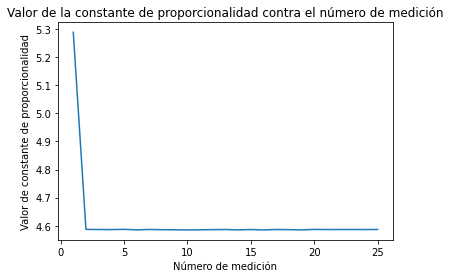

In [8]:
R = np.arange(1,len(S1)+1,1)

plt.plot(R,S1)
plt.title('Valor de la constante de proporcionalidad contra el número de medición')
plt.xlabel('Número de medición')
plt.ylabel('Valor de constante de proporcionalidad')
plt.show()


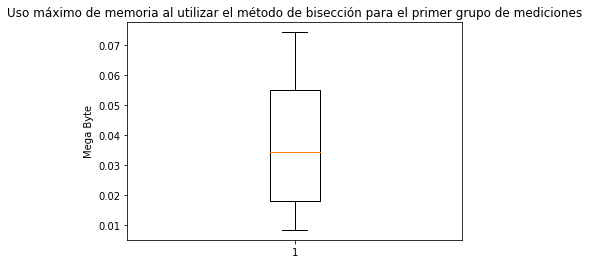

In [9]:
plt.boxplot(M1)
plt.ylabel('Mega Byte')
plt.title('Uso máximo de memoria al utilizar el método de bisección para el primer grupo de mediciones')
plt.show()

In [30]:
S2 = []
T2 = []
M2 = []
for j in range(len(y2)):
    y = y2[j]
    t = t2[j]
    f = y-(2*g/S) * (2/S* sy.ln((e**(S*t)+1)/2)-t) #Función
    tracemalloc.start()
    valor,NI,TE = Biseccion(f,2,10)
    T2.append(TE)
    actual, pico = tracemalloc.get_traced_memory()
    M2.append(((pico/1024**2)-(actual/1024**2)))
    print('Memoria actual: ', round(actual/(1024**2),4), "; Pico: ", round(pico/(1024**2),4))
    tracemalloc.reset_peak()
    S2.append(valor)
tracemalloc.stop()

Memoria actual:  0.4702 ; Pico:  0.4776
Memoria actual:  0.7061 ; Pico:  0.7345
Memoria actual:  0.9753 ; Pico:  0.9988
Memoria actual:  1.3178 ; Pico:  1.3257
Memoria actual:  1.4757 ; Pico:  1.5324
Memoria actual:  1.6337 ; Pico:  1.6835
Memoria actual:  1.7799 ; Pico:  1.7993
Memoria actual:  1.9292 ; Pico:  1.941
Memoria actual:  2.015 ; Pico:  2.081
Memoria actual:  2.2082 ; Pico:  2.2735
Memoria actual:  2.3351 ; Pico:  2.3987
Memoria actual:  2.4525 ; Pico:  2.5149
Memoria actual:  2.5791 ; Pico:  2.6868
Memoria actual:  2.7269 ; Pico:  2.7487
Memoria actual:  2.8411 ; Pico:  2.8692
Memoria actual:  2.993 ; Pico:  3.0009
Memoria actual:  3.0421 ; Pico:  3.105
Memoria actual:  3.1719 ; Pico:  3.2312
Memoria actual:  3.2944 ; Pico:  3.3447
Memoria actual:  3.4037 ; Pico:  3.4736
Memoria actual:  3.5168 ; Pico:  3.5857
Memoria actual:  3.7996 ; Pico:  3.8382
Memoria actual:  3.9072 ; Pico:  3.9293
Memoria actual:  3.9993 ; Pico:  4.0521
Memoria actual:  4.0904 ; Pico:  4.1551
Memor

In [31]:
np.mean(S2)

4.797288219650071

In [32]:
np.std(S2)

0.011398869653024772

In [33]:
np.mean(T2)

0.2550876246753248

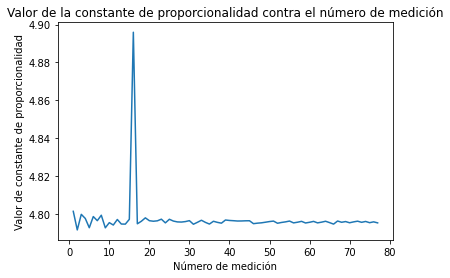

In [34]:
R = np.arange(1,len(S2)+1,1)

plt.plot(R,S2)
plt.title('Valor de la constante de proporcionalidad contra el número de medición')
plt.xlabel('Número de medición')
plt.ylabel('Valor de constante de proporcionalidad')
plt.show()

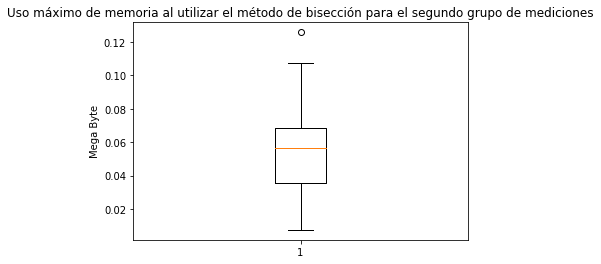

In [35]:
plt.boxplot(M2)
plt.ylabel('Mega Byte')
plt.title('Uso máximo de memoria al utilizar el método de bisección para el segundo grupo de mediciones')
plt.show()

## Método Abierto: Newton

In [36]:
F = y-(2*g/S) * (2/S* sy.ln((e**(S*t)+1)/2)-t)
dF = diff(F,S)

fun = lambdify(S, F)
dfun = lambdify(S, dF)


In [37]:
def Newton(xo,ea):
    start = timeit.default_timer()
    M = []
    NI = []
    XR = []
    XL = []
    XU = []
    FL = []
    FR = []
    FU = []
    EA = []
    Meto = 0
    
    Ea = 100
    while Ea > ea:
        Xr = xo - fun(xo)/dfun(xo)
        xo = Xr
        XR.append(Xr)


        if len(XR) <= 1:
            EA.append(Ea)
        else:
            Ea = (abs(XR[-1]-XR[-2])/XR[-1])*100
            EA.append(Ea)

    Biseccion = list(zip(XR,EA))
    Df = pd.DataFrame(Biseccion)
    Df.columns = [ 'XR', 'EA']
    
    end = timeit.default_timer()
    return XR[-1], len(XR),(end-start)
    

In [38]:
S3 = []
T3 = []
M3 = []
for j in range(len(y1)):
    y = y1[j]
    t = t1[j]
    f = y-(2*g/S) * (2/S* sy.ln((e**(S*t)+1)/2)-t) #Función
    tracemalloc.start()
    valor,NI,TE = Newton(3,.00000001)
    T3.append(TE)
    actual, pico = tracemalloc.get_traced_memory()
    print('Memoria actual: ', round(actual/(1024**2),4), "; Pico: ", round(pico/(1024**2),4))
    M3.append(((pico/1024**2)-(actual/1024**2)))
    tracemalloc.reset_peak()
    S3.append(valor)
tracemalloc.stop()

Memoria actual:  0.0019 ; Pico:  0.006
Memoria actual:  0.0279 ; Pico:  0.0326
Memoria actual:  0.0531 ; Pico:  0.0578
Memoria actual:  0.0565 ; Pico:  0.0612
Memoria actual:  0.0729 ; Pico:  0.0793
Memoria actual:  0.0936 ; Pico:  0.0983
Memoria actual:  0.1137 ; Pico:  0.1183
Memoria actual:  0.1347 ; Pico:  0.1393
Memoria actual:  0.1557 ; Pico:  0.1603
Memoria actual:  0.1769 ; Pico:  0.1815
Memoria actual:  0.1975 ; Pico:  0.2031
Memoria actual:  0.2177 ; Pico:  0.2223
Memoria actual:  0.2372 ; Pico:  0.2434
Memoria actual:  0.2547 ; Pico:  0.2594
Memoria actual:  0.2744 ; Pico:  0.279
Memoria actual:  0.2877 ; Pico:  0.2923
Memoria actual:  0.3083 ; Pico:  0.3135
Memoria actual:  0.3286 ; Pico:  0.3332
Memoria actual:  0.3487 ; Pico:  0.3534
Memoria actual:  0.368 ; Pico:  0.3726
Memoria actual:  0.3898 ; Pico:  0.3944
Memoria actual:  0.412 ; Pico:  0.4166
Memoria actual:  0.4264 ; Pico:  0.431
Memoria actual:  0.4462 ; Pico:  0.4509
Memoria actual:  0.4644 ; Pico:  0.469


In [39]:
np.mean(S3)

4.795351544165967

In [40]:
np.std(S3)

0.0

In [41]:
np.mean(T3)

0.0015250160000005054

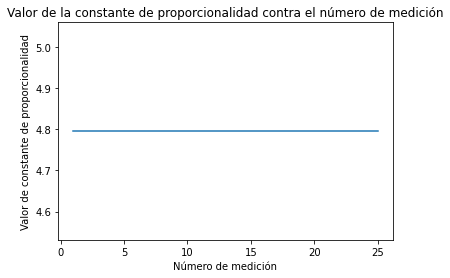

In [42]:
R = np.arange(1,len(S3)+1,1)

plt.plot(R,S3)
plt.title('Valor de la constante de proporcionalidad contra el número de medición')
plt.xlabel('Número de medición')
plt.ylabel('Valor de constante de proporcionalidad')
plt.show()

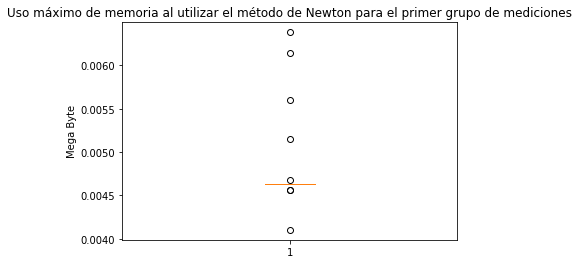

In [43]:
plt.boxplot(M3)
plt.ylabel('Mega Byte')
plt.title('Uso máximo de memoria al utilizar el método de Newton para el primer grupo de mediciones')
plt.show()

In [44]:
S4 = []
T4 = []
M5 = []
for j in range(len(y2)):
    y = y2[j]
    t = t2[j]
    tracemalloc.start()
    valor,NI,TE = Newton(3,.00000001)
    T4.append(TE)
    actual, pico = tracemalloc.get_traced_memory()
    print('Memoria actual: ', round(actual/(1024**2),4), "; Pico: ", round(pico/(1024**2),4))
    M5.append(((pico/1024**2)-(actual/1024**2)))
    tracemalloc.reset_peak()
    S4.append(valor)
tracemalloc.stop()

Memoria actual:  0.0017 ; Pico:  0.0058
Memoria actual:  0.0052 ; Pico:  0.0093
Memoria actual:  0.0075 ; Pico:  0.0116
Memoria actual:  0.0098 ; Pico:  0.0139
Memoria actual:  0.0121 ; Pico:  0.0162
Memoria actual:  0.0144 ; Pico:  0.0186
Memoria actual:  0.0164 ; Pico:  0.0209
Memoria actual:  0.0183 ; Pico:  0.0228
Memoria actual:  0.0202 ; Pico:  0.0247
Memoria actual:  0.0221 ; Pico:  0.0267
Memoria actual:  0.0239 ; Pico:  0.0286
Memoria actual:  0.0262 ; Pico:  0.0308
Memoria actual:  0.0281 ; Pico:  0.0327
Memoria actual:  0.0109 ; Pico:  0.0154
Memoria actual:  0.0113 ; Pico:  0.0158
Memoria actual:  0.0118 ; Pico:  0.0162
Memoria actual:  0.0136 ; Pico:  0.0182
Memoria actual:  0.0156 ; Pico:  0.0202
Memoria actual:  0.0174 ; Pico:  0.0221
Memoria actual:  0.0193 ; Pico:  0.0239
Memoria actual:  0.0211 ; Pico:  0.0257
Memoria actual:  0.0229 ; Pico:  0.0275
Memoria actual:  0.0129 ; Pico:  0.0175
Memoria actual:  0.0148 ; Pico:  0.0194
Memoria actual:  0.0167 ; Pico:  0.0212


In [45]:
np.mean(S4)

4.795351544165966

In [46]:
np.std(S4)

8.881784197001252e-16

In [47]:
np.mean(TE)

0.0012360999999998512

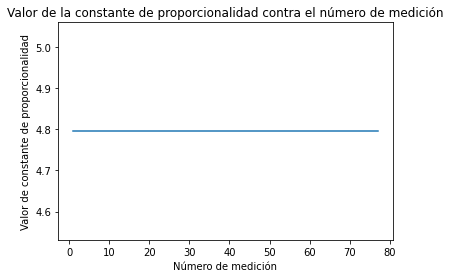

In [48]:
R = np.arange(1,len(S4)+1,1)

plt.plot(R,S4)
plt.title('Valor de la constante de proporcionalidad contra el número de medición')
plt.xlabel('Número de medición')
plt.ylabel('Valor de constante de proporcionalidad')
plt.show()

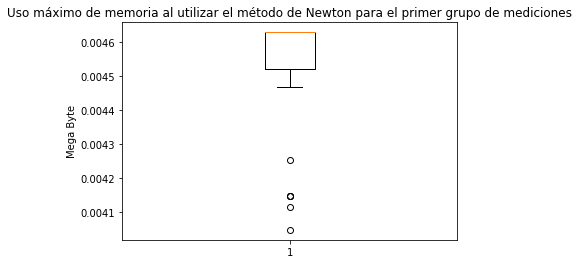

In [49]:
plt.boxplot(M5)
plt.ylabel('Mega Byte')
plt.title('Uso máximo de memoria al utilizar el método de Newton para el primer grupo de mediciones')
plt.show()